In [9]:
##############################  Segmentation  ##############################

import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns  # visualization

from mpl_toolkits.mplot3d import Axes3D # 3d plot
from sklearn.preprocessing import StandardScaler # data normalization

data=pd.read_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/data_cleaned.csv')

data=data.drop(["Claim_Cancellation"], axis=1)

cluster_data = StandardScaler().fit_transform(data)

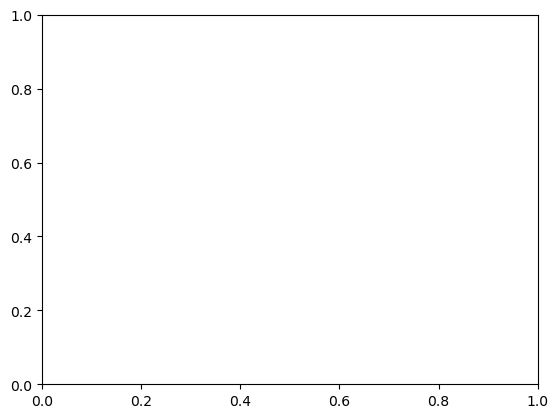

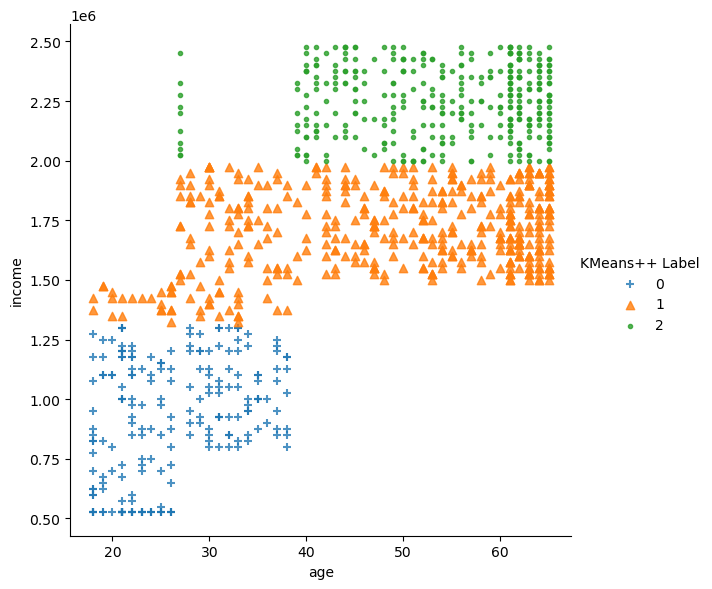

In [10]:
########################################################
#################### KMeans++ Clustering #################
from sklearn.cluster import KMeans
#Number of cluster is taken as 3 from KMeans scree plot, the alogrithm is run 12 times with K-means++
model = KMeans(init = 'k-means++', n_clusters = 3,n_init = 12).fit(data)

# MODEL INSIGHTS
data['KMeans++ Label'] = model.labels_

''' We need to decide which features need to infered on'''
# 3D 
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(data['Renewal'], data['age'], data['income'], 
           c = data['KMeans++ Label'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Renewal', 
              fontsize = 16)
ax.set_ylabel('age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()

markers = ['+', '^','.']
sns.lmplot(x="age", y="income", data= data, hue = "KMeans++ Label", fit_reg=False, markers = markers,height = 6)



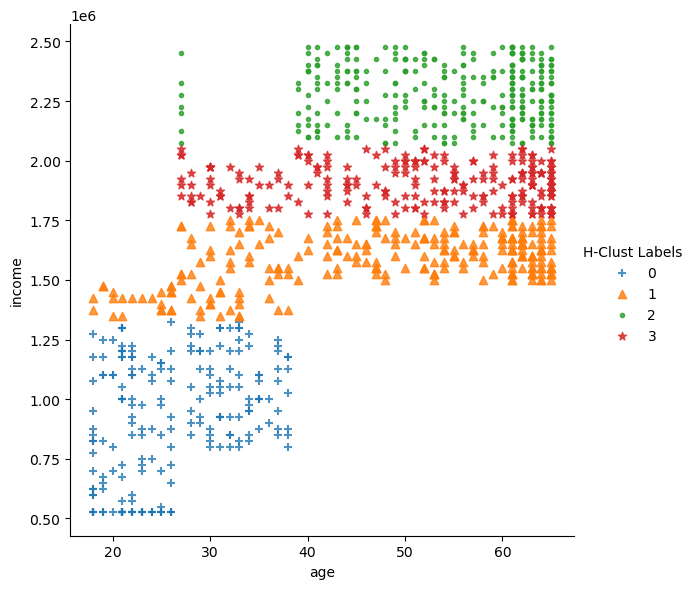

In [11]:
##############################################################
#################### Hierarchical Clustering #################
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

z = linkage(data, method = "complete", metric = "euclidean")

# Dendrogram
plt.figure(figsize=(100,100));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

#From Dendrogram selecting number of cluster as 4
h_cluster = AgglomerativeClustering(4).fit(data)
data["H-Clust Labels"] = h_cluster.labels_

''' We need to decide which features need to infered on'''
#Plotting Clusters with their segments
markers = ['+', '^','.', '*']
sns.lmplot(x="age", y="income", data= data, hue = "H-Clust Labels", fit_reg=False, markers = markers,height = 6)

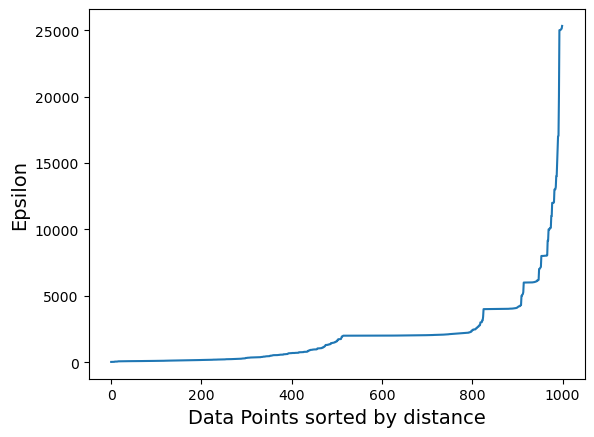

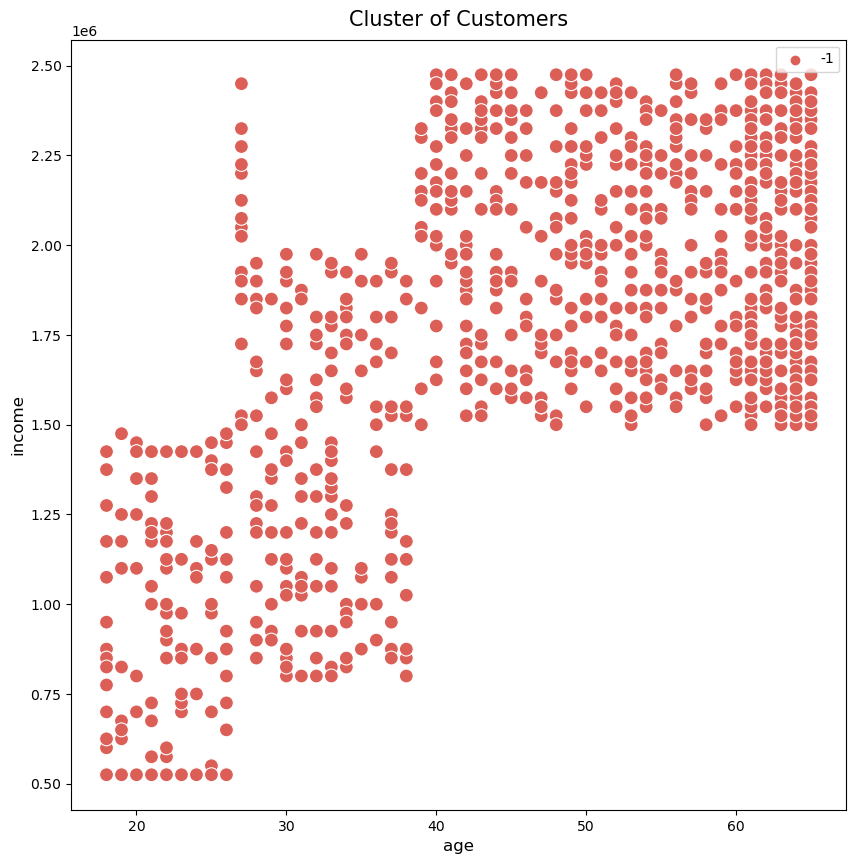

In [12]:
#############################################
#################### DBSCAN #################

# Finding nearest points distance for every row in data
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2).fit(data)
distances, indices = neigh.kneighbors(data)

# Plotting K-distance Graph
distances = np.sort(distances[:,1], axis=0)


plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

model = DBSCAN(eps=15,min_samples=3)
y = model.fit_predict(data)

''' We need to decide which features need to infered on'''
# Visualizing all the clusters 
plt.figure(figsize=(10,10))
sns.scatterplot(x=data.age, y=data.income, 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=100)
plt.title('Cluster of Customers', size=15, pad=10)
plt.xlabel("age", size=12)
plt.ylabel("income", size=12)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

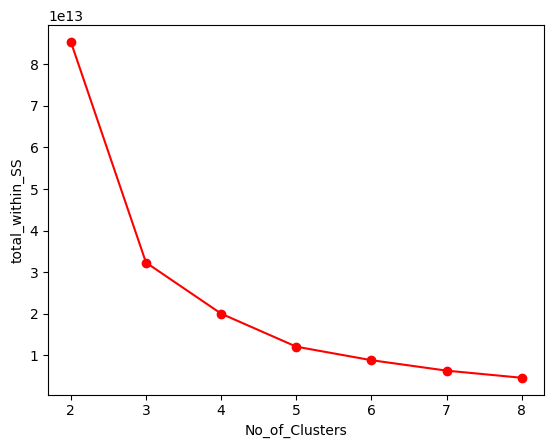

In [13]:

########################################################
#################### KMeans Clustering #################

from sklearn.cluster import KMeans
###### Scree plot or elbow curve
TWSS = []
k = list(range(2,9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)
    

# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3,random_state=0).fit(data)

model.labels_ # getting the labels of clusters assigned to each row 
''' converting numpy array into pandas series object  and 
creating a  new column and assigning it to new column '''
data['KMeans_Label'] = pd.Series(model.labels_)
data.sort_values('KMeans_Label', ascending=True,inplace=True)
data.reset_index(inplace = True,drop=True)

cluster1_data=data.iloc[:370,:]
cluster2_data=data.iloc[370:589,:]
cluster3_data=data.iloc[589:,:]

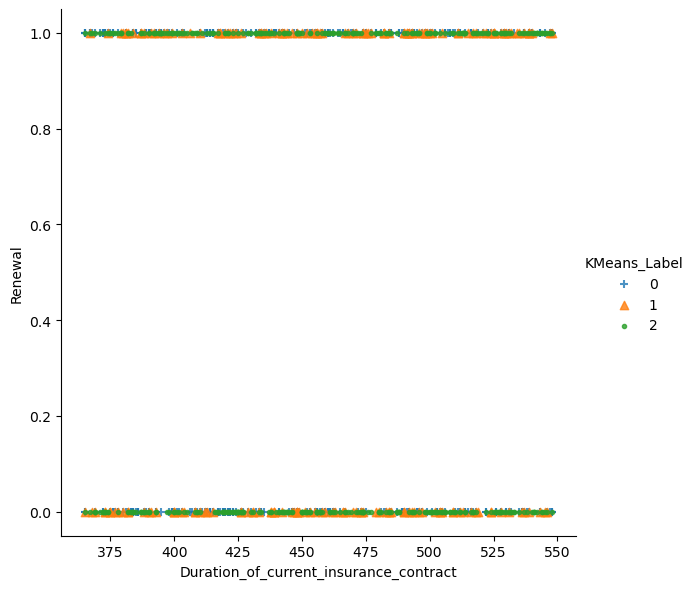

In [15]:
cluster1_data.to_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/Cluster_1.csv', index=False)
cluster2_data.to_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/Cluster_2.csv', index=False)
cluster3_data.to_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/Cluster_3.csv', index=False)

''' We need to decide which features need to infered on'''
#Plotting Clusters with their segments
markers = ['+', '^','.']
sns.lmplot(x="Duration_of_current_insurance_contract", y="Renewal", data= data, hue = "KMeans_Label", fit_reg=False, markers = markers,
         height = 6)